### 1. **Data Preprocessing:**
   - **Question:** Write a Python function to calculate the percentage of missing values for each column in the dataset. Use the function to identify columns with missing values in the Titanic dataset and display their percentages. Visualize the missing data percentages using a **bar plot**.
   - **Hint:** Use the `isnull()` method combined with `sum()` to count missing values for each column. Divide the missing values by the total number of rows to calculate percentages. For visualization, use Matplotlib or Seaborn to create a bar plot.

   ---
   

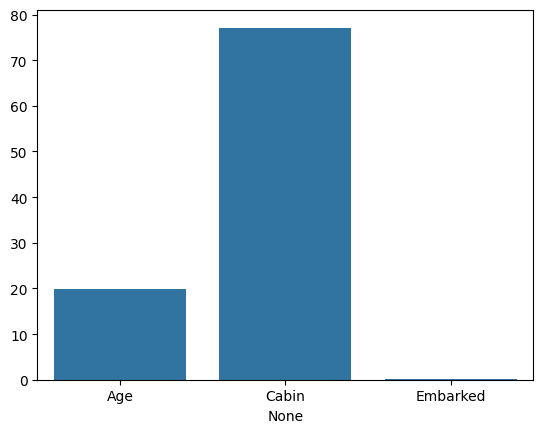

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def missing_data_percentage(df):
    missing_percentage = df.isnull().sum() / len(df) * 100
    return missing_percentage

titanic = pd.read_csv('titanic.csv')

# Calculate missing data percentages
missing_percentages = missing_data_percentage(titanic)

# Filter columns with missing data
missing_columns = missing_percentages[missing_percentages > 0]



sns.barplot(x=missing_columns.index, y=missing_columns.values)
plt.show()


---

### 2. **Feature Creation:**
   - **Question:** Create a new column **Age_Category** by categorizing passengers into three groups: **Child** (0-12), **Teen** (13-19), **Adult** (20+). Calculate the survival rate for each group and compare the results.
   - **Hint:** Use the `pd.cut()` method to create bins for age categories. Group the data by the new column using `groupby()` and calculate the mean survival rate for each group.
---

C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\746711175.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival_rate = titanic.groupby('Age_Category')['Survived'].mean()


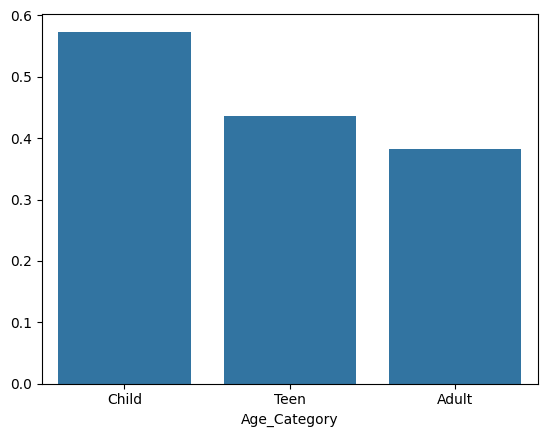

In [38]:
# Create Age_Category column
bins = [0, 12, 19, float('inf')]
labels = ['Child', 'Teen', 'Adult']
titanic['Age_Category'] = pd.cut(titanic['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate by Age_Category
age_survival_rate = titanic.groupby('Age_Category')['Survived'].mean()


sns.barplot(x=age_survival_rate.index, y=age_survival_rate.values)

plt.show()


---
### 3. **Family Impact on Survival:**
   - **Question:** Investigate the impact of family size on survival. Create a new column **Large_Family** (True if **Family_Size** > 3, False otherwise). Calculate and visualize the survival rate for passengers with large families versus those without using a **bar plot**.
   - **Hint:** Family size can be calculated as the sum of `SibSp` and `Parch` plus one (self). Use a conditional statement (`> 3`) to create the new column. Use `groupby()` to find the survival rates and visualize the results with a bar plot.
---


C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\1997698121.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=family_survival_rate.index, y=family_survival_rate.values, palette='pastel')


Large_Family
False    0.388750
True     0.340659
Name: Survived, dtype: float64


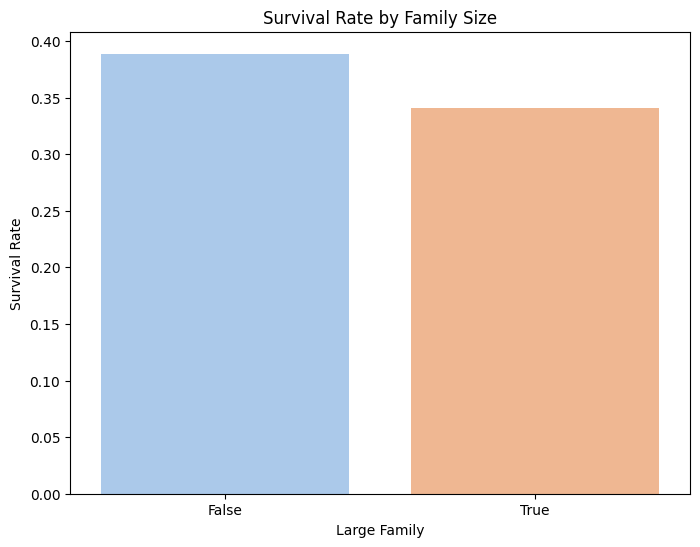

In [39]:
# Create Family_Size column
titanic['Family_Size'] = titanic['SibSp'] + titanic['Parch'] + 1  # +1 for the passenger

# Create Large_Family column
titanic['Large_Family'] = titanic['Family_Size'] > 3

# Calculate survival rate by Large_Family
family_survival_rate = titanic.groupby('Large_Family')['Survived'].mean()

# Display the survival rates
print(family_survival_rate)

# Visualize the survival rate by family size
plt.figure(figsize=(8, 6))
sns.barplot(x=family_survival_rate.index, y=family_survival_rate.values, palette='pastel')
plt.title('Survival Rate by Family Size')
plt.xlabel('Large Family')
plt.ylabel('Survival Rate')
plt.show()


---

### 4. **Passenger Class and Fare Analysis:**
   - **Question:** Compare the distribution of **Fare** across the different **Passenger_Class** categories using a **box plot**. What can you conclude about the distribution of ticket prices for each class? Are there any outliers?
   - **Hint:** Use Seaborn's `boxplot()` function with `Pclass` on the x-axis and `Fare` on the y-axis. Look for the spread of values and points outside the whiskers to identify outliers.
---

C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\7738953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=titanic, palette='muted')


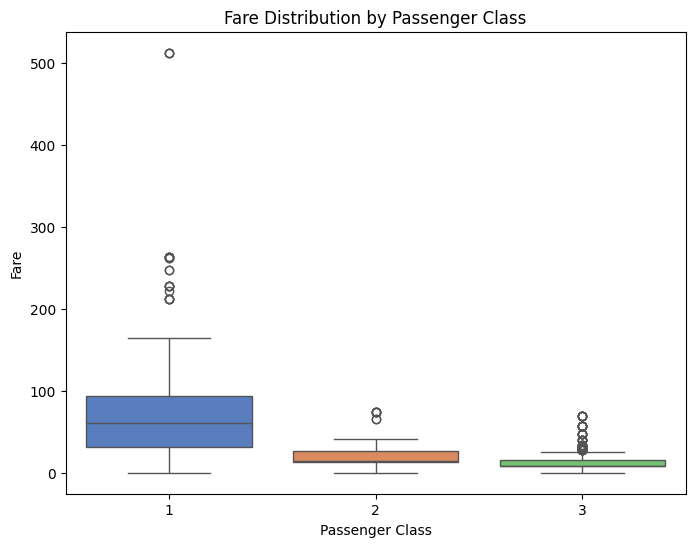

In [40]:
# Visualize Fare distribution by Passenger Class using a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=titanic, palette='muted')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


---

### 5. **Embarked Location Analysis:**
   - **Question:** Analyze the survival rates based on the **Embarked** column (Cherbourg, Queenstown, and Southampton). Create a **bar plot** to visualize the survival rate for passengers who boarded at each of the three locations. Which embarkation point had the highest survival rate?
   - **Hint:** Use `groupby()` on the Embarked column and calculate the mean survival rate. Use Matplotlib or Seaborn to create a bar plot showing survival rates.


---


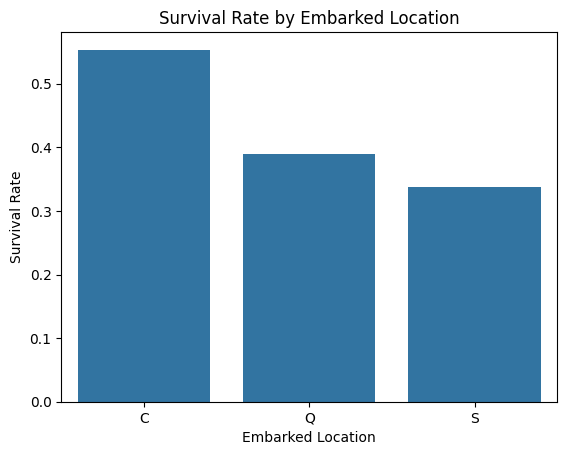

In [41]:
# Calculate survival rate by Embarked location
embarked_survival_rate = titanic.groupby('Embarked')['Survived'].mean()

# Visualize survival rate by Embarked location
sns.barplot(x=embarked_survival_rate.index, y=embarked_survival_rate.values)
plt.title('Survival Rate by Embarked Location')
plt.xlabel('Embarked Location')
plt.ylabel('Survival Rate')
plt.show()


---
### 6. **Passenger Cabin Analysis:**
   - **Question:** Investigate the **Cabin** column to check for missing or irregular data. Create a new column **Has_Cabin** where 1 indicates that a passenger has a cabin, and 0 indicates they do not. Calculate the survival rate for passengers with and without cabins. Visualize the results using a **bar plot**.
   - **Hint:** Use the `notnull()` method on the Cabin column to check if a passenger has a cabin. Convert the Boolean values to integers for the new column. Use `groupby()` to calculate survival rates and a bar plot for visualization.
---



C:\Users\Admin\AppData\Local\Temp\ipykernel_1288\2454353763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cabin_survival_rate.index, y=cabin_survival_rate.values, palette='coolwarm')


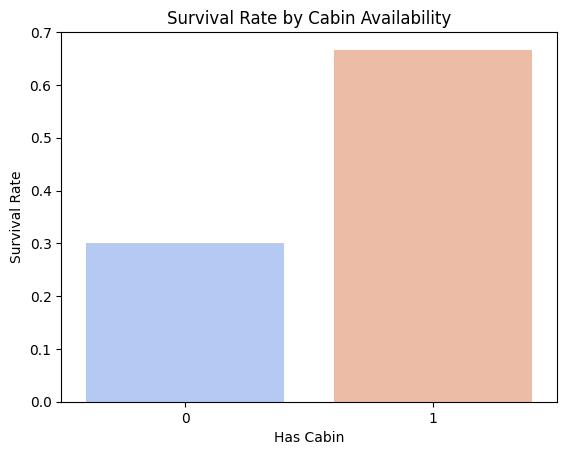

In [42]:
# Create Has_Cabin column (1 if cabin exists, 0 otherwise)
titanic['Has_Cabin'] = titanic['Cabin'].notnull().astype(int)

# Calculate survival rate by Has_Cabin
cabin_survival_rate = titanic.groupby('Has_Cabin')['Survived'].mean()

# Visualize the survival rate by cabin presence
sns.barplot(x=cabin_survival_rate.index, y=cabin_survival_rate.values, palette='coolwarm')
plt.title('Survival Rate by Cabin Availability')
plt.xlabel('Has Cabin')
plt.ylabel('Survival Rate')
plt.show()


---
## Additional Practice Question: Wine Quality Dataset - Basic Data Exploration

**Question:**
- Load the **Wine Quality Dataset** from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality) or from a CSV file.
- Perform the following tasks:
  1. Display the first 5 rows of the dataset.
  2. Check if there are any missing values in the dataset.
  3. Calculate and print the median of the **alcohol** and **pH** columns.
  4. Create a **box plot** to show the distribution of the **fixed acidity**.
  5. Create a **pair plot** to visualize the relationships between **citric acid**, **residual sugar**, and **density**.

---

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Wine Quality Dataset (replace with the correct path if necessary)
wine_data = pd.read_csv('winequality-red.csv')  # Assuming it's in the current directory

# Display the first 5 rows of the dataset
print(wine_data.head())

# 2. Check if there are any missing values in the dataset
print(wine_data.isnull().sum())

# 3. Calculate and print the median of the alcohol and pH columns
alcohol_median = wine_data['alcohol'].median()
ph_median = wine_data['pH'].median()

print(f'Median of Alcohol: {alcohol_median}')
print(f'Median of pH: {ph_median}')

# 4. Create a box plot to show the distribution of the fixed acidity
plt.figure(figsize=(8, 6))
sns.boxplot(x=wine_data['fixed acidity'])
plt.title('Distribution of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.show()

# 5. Create a pair plot to visualize relationships between citric acid, residual sugar, and density
sns.pairplot(wine_data[['citric acid', 'residual sugar', 'density']])
plt.show()


  fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                  

KeyError: 'alcohol'